# WQU Msc Financial Engineering Financial Data GWP 2

### Money at a fixed rate for an unsecured purchase: 

Datasets to obtain: 
1. Credit Card Default Rates in the US for the past 8 years.
2. Historical Debt-Income Ratios of Credit Card Clients in The US for the past 8 Years. 

In [113]:
#import dependencies 
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### Fetch The Data:

Since the credit default data is not available on Yahoo Finance, we will download the datasets using Pandas Datareader, using the FRED API. 

In [114]:
#import the credit default data: 

# Define the date range
start = datetime(2016, 1, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
credit_card_defaults_df = web.DataReader('DRCCLACBS', 'fred', start, end)

credit_card_defaults_df.reset_index(inplace=True)
credit_card_defaults_df.head(2)


,DATE,DRCCLACBS
0,2016-01-01,2.14
1,2016-04-01,2.21


In [115]:
#import historical debt service payments to income in the US

# Define the date range
start = datetime(2016, 1, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
debt_income_df = web.DataReader('TDSP', 'fred', start, end)

debt_income_df.reset_index(inplace=True)
debt_income_df.head(2)

,DATE,TDSP
0,2016-01-01,11.763075
1,2016-04-01,11.765966


In [116]:
#combine the three dataframes into one dataframe for analysis

combined_df = credit_card_defaults_df.copy()
combined_df.rename(columns={'DRCCLACBS': 'credit_default_rate'}, inplace=True)
combined_df['debt_income_ratio'] = debt_income_df['TDSP']
combined_df.head(2)

,DATE,credit_default_rate,debt_income_ratio
0,2016-01-01,2.14,11.763075
1,2016-04-01,2.21,11.765966


### Analyze the Data:

In [117]:
combined_df[['credit_default_rate', 'debt_income_ratio']].describe()

,credit_default_rate,debt_income_ratio
count,34.000000,34.000000
mean,2.370000,11.137773
std,0.433037,0.738567
min,1.540000,9.095642
25%,2.117500,10.717774
50%,2.465000,11.528270
75%,2.580000,11.709283
max,3.250000,11.865676


#### 1. Credit Default Rates:

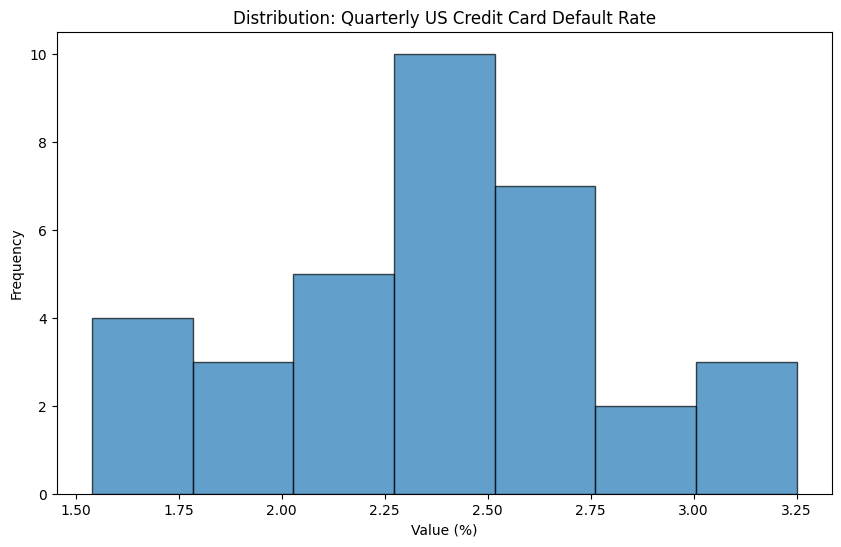

In [118]:
# Analyze the distribution of the credit default rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['credit_default_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly US Credit Card Default Rate')
plt.xlabel('Value (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above graph shows the distribution of the quarterly average credit card default rate for the United States.  This shows us that on average the credit card default rate is somewhere between 1.5% - 3.25% with the most common default rate between 2.25% - 2.50%. 


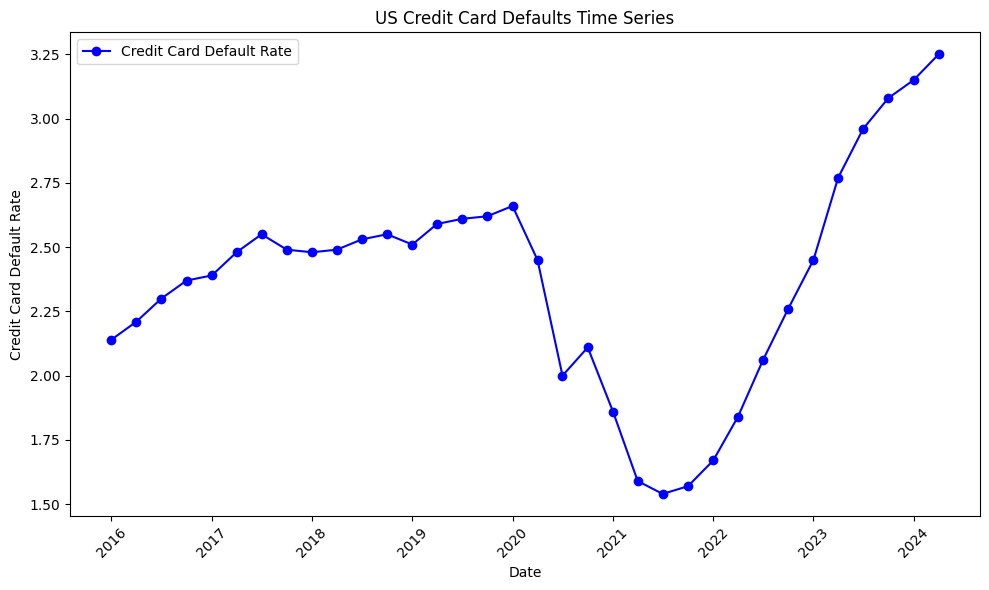

In [119]:
# Analyze the US credit card default rates over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['credit_default_rate'], marker='o', color='blue', label='Credit Card Default Rate')

# Add titles and labels
plt.title('US Credit Card Defaults Time Series')
plt.xlabel('Date')
plt.ylabel('Credit Card Default Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The time series plot above shows that credit card default rates have increased dramatically in recent months, which would indicate that there is currently a large risk in offering unsecured loans. 


#### 2. Debt to Income Ratio:

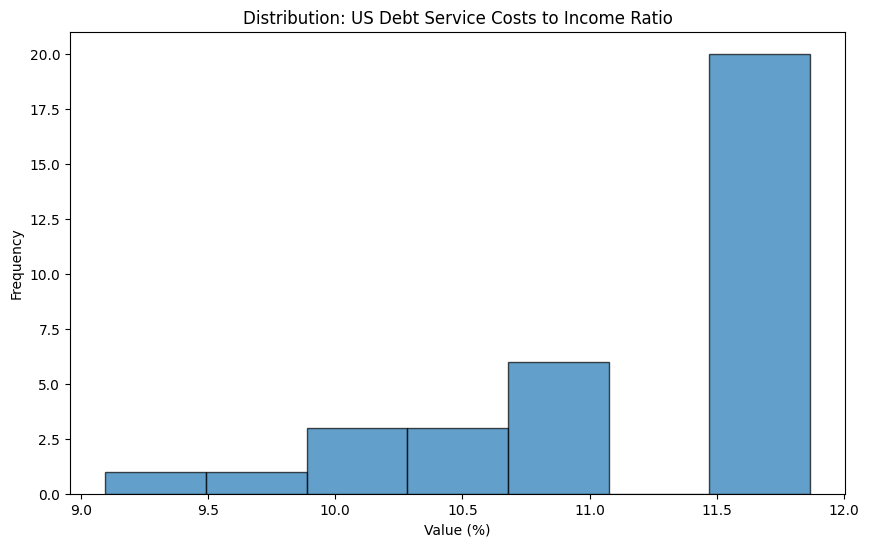

In [120]:
#Analyze the distribution of the US Prime Lending Rate per quarter 

plt.figure(figsize=(10, 6))
plt.hist(combined_df['debt_income_ratio'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: US Debt Service Costs to Income Ratio')
plt.xlabel('Value (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution plot shows that the debt costs to income ratio data is extremely skewed with the majority of values ranging from 11.5% to 12%. The long left tail however shows that there can be some volatility and extreme values on the lower end of the scale, which implies that this figure could be difficult to predict or forecast. 


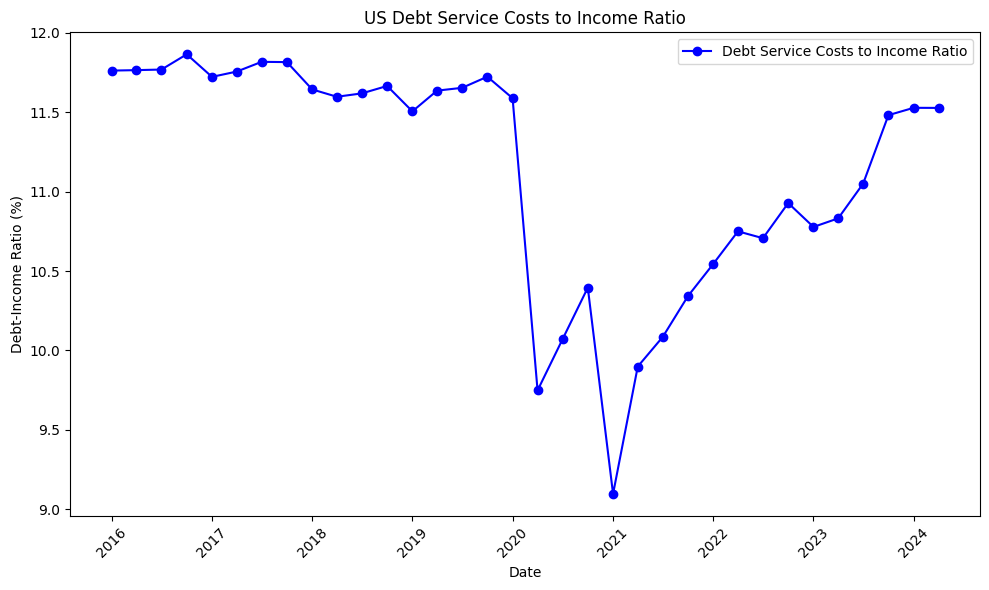

In [121]:
# Analyze the US prime lending rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['debt_income_ratio'], marker='o', color='blue', label='Debt Service Costs to Income Ratio')

# Add titles and labels
plt.title('US Debt Service Costs to Income Ratio')
plt.xlabel('Date')
plt.ylabel('Debt-Income Ratio (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot shows that the debt to income ratio of US households has risen quite sharply since covid. This is to be expected as globally we have experienced a high interest rate environment. This could imply that now is a particularly risky time to be issuing unsecured debt as consumers are already highly leveraged and could be operating outside of their means. 

#### Relationship Between Credit Defaults and Debt to Income Ratio (Leverage):

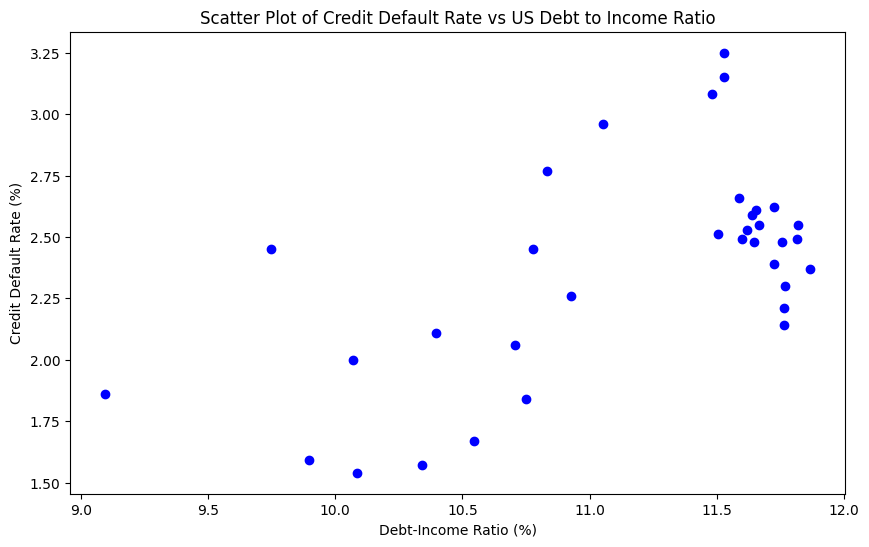

In [122]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['debt_income_ratio'], combined_df['credit_default_rate'], color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Credit Default Rate vs US Debt to Income Ratio')
plt.xlabel('Debt-Income Ratio (%)')
plt.ylabel('Credit Default Rate (%)')
plt.grid(visible=False)

# Show the plot
plt.show()


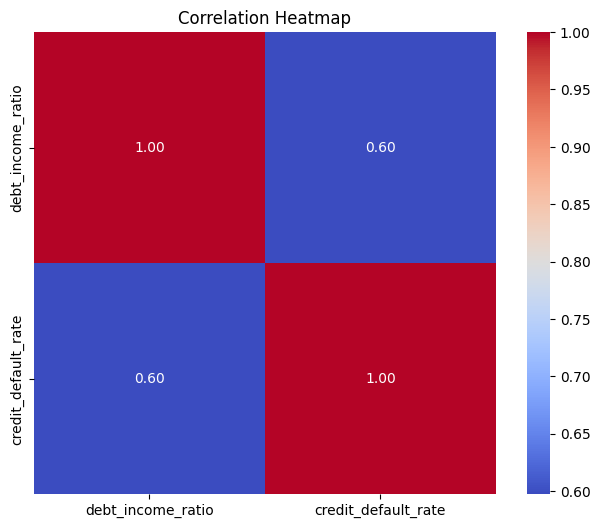

In [123]:
# Calculate the correlation matrix
correlation_matrix = combined_df[['debt_income_ratio', 'credit_default_rate']].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Title and show the plot
plt.title('Correlation Heatmap')
plt.show()

The above scatter plot and accompanying correlation heatmap shows that there is a moderate, positive correlation between debt to income ratios for US customers and credit card default rates. This shows that although debt to income ratios can be a strong predictor of credit default rates, additional data sources may be required for making more accurate predictions. 

### Publicly Traded Bond: 

#### Datasets to obtain: 
1. Current Debt - Equity ratios of companies in the Dow 30.
2. Credit Ratings of companies in the Dow 30.

#### Fetch The Data:


In [124]:
# List of tickers for dow 30:
tickers = [
    "MMM",  # 3M
    "AXP",  # American Express
    "AMGN",  # Amgen
    "AAPL",  # Apple
    "BA",  # Boeing
    "CAT",  # Caterpillar
    "CVX",  # Chevron
    "CSCO",  # Cisco Systems
    "KO",  # Coca-Cola
    "DIS",  # Disney
    "DOW",  # Dow
    "GS",  # Goldman Sachs
    "HD",  # Home Depot
    "HON",  # Honeywell
    "IBM",  # IBM
    "INTC",  # Intel
    "JNJ",  # Johnson & Johnson
    "JPM",  # JP Morgan Chase
    "MCD",  # McDonald's
    "MRK",  # Merck
    "MSFT",  # Microsoft
    "NKE",  # Nike
    "PG",  # Procter & Gamble
    "CRM",  # Salesforce
    "TRV",  # Travelers
    "UNH",  # UnitedHealth
    "V",  # Visa
    "WBA",  # Walgreens
    "WMT"  # Walmart
]

# Dictionary to hold Debt-to-Equity ratios
de_ratios = {}

# Iterate through each ticker and fetch Debt-to-Equity ratio
for ticker in tickers:
    # Get the ticker data from Yahoo Finance
    stock = yf.Ticker(ticker)
    
    # Attempt to get the debt-to-equity ratio from the 'info' field
    info = stock.info
    de_ratio = None
    
    if 'debtToEquity' in info:
        de_ratio = info['debtToEquity']
    
    # If not available in 'info', calculate it from the balance sheet
    if de_ratio is None:
        balance_sheet = stock.balance_sheet
        if 'Long Term Debt' in balance_sheet.index and 'Total Stockholder Equity' in balance_sheet.index:
            long_term_debt = balance_sheet.loc['Long Term Debt']
            short_term_debt = balance_sheet.loc.get('Short Long Term Debt', 0)  # Default to 0 if missing
            total_debt = long_term_debt + short_term_debt
            
            total_equity = balance_sheet.loc['Total Stockholder Equity']
            
            if total_equity != 0 and not pd.isna(total_equity):
                de_ratio = total_debt / total_equity
    
    # Store the Debt-to-Equity ratio if available
    if de_ratio is not None:
        de_ratios[ticker] = de_ratio

# Convert results into a DataFrame for better visualization
de_ratios_df = pd.DataFrame.from_dict(de_ratios, orient='index', columns=['Debt-to-Equity_Ratio']).reset_index()
de_ratios_df['Debt-to-Equity_Ratio'] = de_ratios_df['Debt-to-Equity_Ratio'] / 100
de_ratios_df.rename(columns={'index' : 'ticker'}, inplace=True)


# Display the results
de_ratios_df.head(2)

,ticker,Debt-to-Equity_Ratio
0,MMM,3.45812
1,AXP,1.80044


In [125]:
#get the credit rating for each stock in the Dow 30

#credit ratings were sources manually as no free API is available 

credit_rating_df = pd.read_csv(r'dow_30_credit_ratings.csv')

credit_rating_df.head(2)

,ticker,Credit_rating
0,MMM,A+
1,AXP,A


In [126]:
#combine the two dataframes in order to analyze the data

combined_df = de_ratios_df.copy()

combined_df['credit_rating'] = credit_rating_df['Credit_rating']

combined_df.head(2)

,ticker,Debt-to-Equity_Ratio,credit_rating
0,MMM,3.45812,A+
1,AXP,1.80044,A


#### Analyze the Data:

In [127]:
combined_df[['Debt-to-Equity_Ratio']].describe()

,Debt-to-Equity_Ratio
count,25.00000
mean,2.18051
std,3.45065
min,0.14466
25%,0.51856
50%,0.86574
75%,1.80044
max,14.79819


#### Debt-Equity Ratios: 

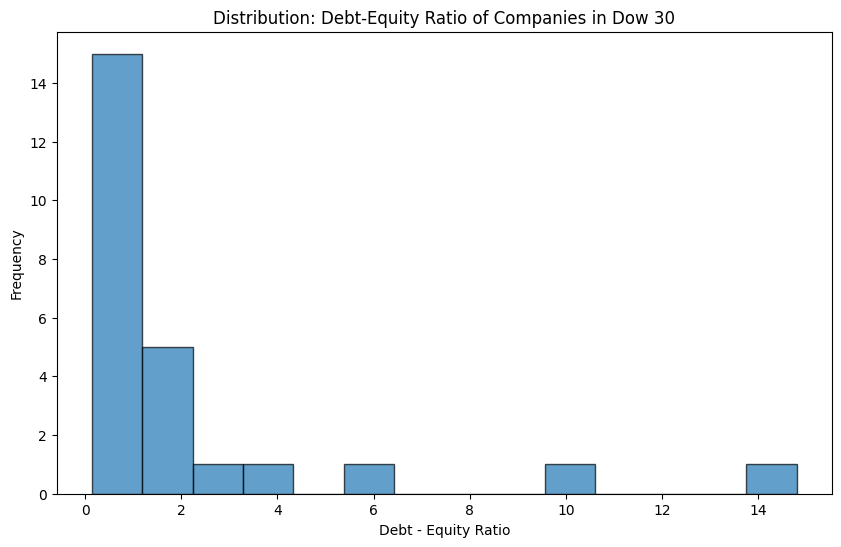

In [128]:
# Analyze the distribution of the US Bond Close Prices

plt.figure(figsize=(10, 6))
plt.hist(combined_df['Debt-to-Equity_Ratio'], bins=14, edgecolor='black', alpha=0.7)
plt.title('Distribution: Debt-Equity Ratio of Companies in Dow 30')
plt.xlabel('Debt - Equity Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution plot shows that there is a large range of debt to equity ratios seen from companies in the Dow 30. Most companies have a relatively low ratio (between 0 and 1) but there are a few examples where companies operate with far more leverage which is seen by the right skew of the distribution. 

#### Relationship Between Debt-Equity Ratios and Credit Ratings

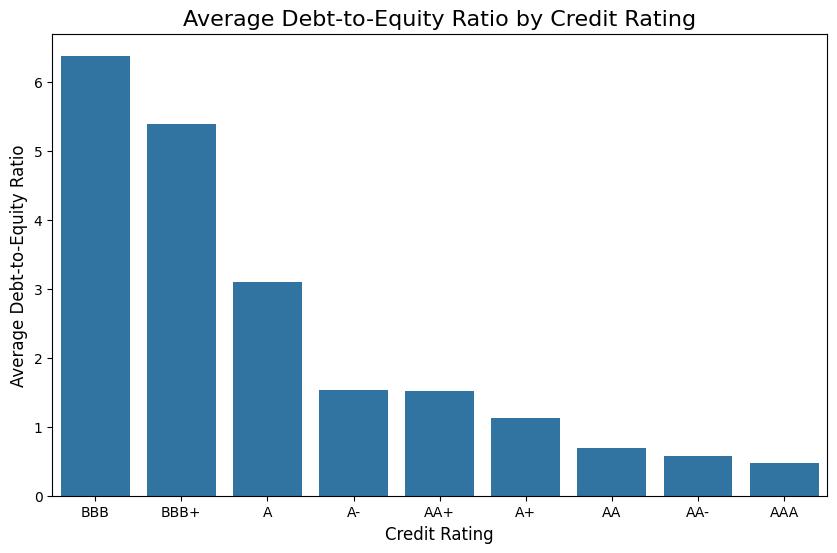

In [129]:
#create a dataframe to calculate mean debt-equity ratio of each credit rating
df_grouped = combined_df.groupby('credit_rating')['Debt-to-Equity_Ratio'].mean().reset_index()

# Sort by Debt-to-Equity Ratio for better visualization (optional)
avg_de_ratio_by_rating = df_grouped.sort_values('Debt-to-Equity_Ratio', ascending=False)

# Plotting using Seaborn (you can also use Matplotlib)
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_de_ratio_by_rating, x='credit_rating', y='Debt-to-Equity_Ratio')

# Adding titles and labels
plt.title('Average Debt-to-Equity Ratio by Credit Rating', fontsize=16)
plt.xlabel('Credit Rating', fontsize=12)
plt.ylabel('Average Debt-to-Equity Ratio', fontsize=12)

# Show the plot
plt.show()



In [130]:
#map the ranking of credit risk ratings to each ranking in order to assess the linear relationship

credit_rating_rank = {
    "AAA": 1,
    "AA+": 2,
    "AA": 3,
    "AA-": 4,
    "A+": 5,
    "A": 6,
    "A-": 7,
    "BBB+": 8,
    "BBB": 9,
}

#map the dictionary to the summary dataframe  
df_grouped['ranking'] = df_grouped['credit_rating'].map(credit_rating_rank)

df_grouped.head(2)


,credit_rating,Debt-to-Equity_Ratio,ranking
0,A,3.099413,6
1,A+,1.123036,5


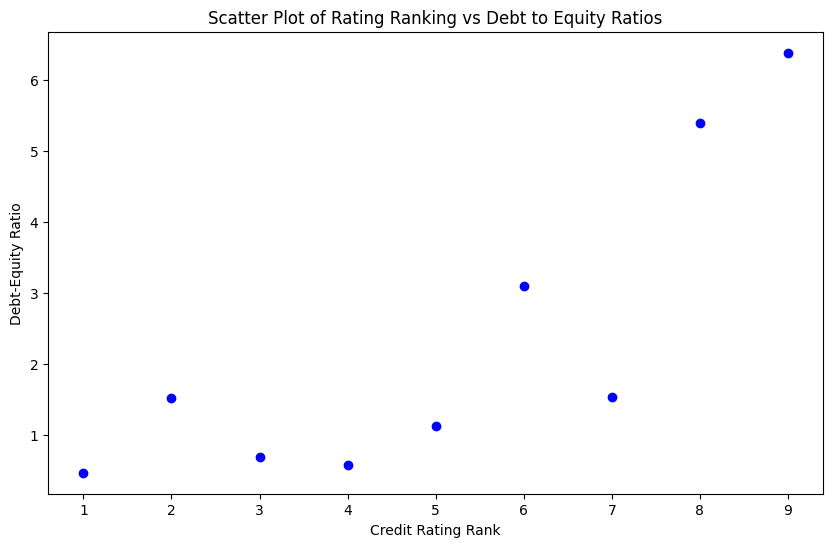

In [131]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_grouped['ranking'], df_grouped['Debt-to-Equity_Ratio'], color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Rating Ranking vs Debt to Equity Ratios')
plt.xlabel('Credit Rating Rank')
plt.ylabel('Debt-Equity Ratio')
plt.grid(visible=False)

# Show the plot
plt.show()

The above bar chart and scatter plot shows that there exists a linear relationship between the debt to equity ratios of companies in the Dow 30 and the credit rating that they are assigned. Companies with higher debt to equity ratios have worse credit ratings than those with the lower debt to equity ratios. This shows the important role that leverage plays in determining the credit risk of a bond issuer. 